In [19]:
import pandas as pd

df = pd.read_csv("trainGhost.csv")
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [2]:
# Encode the color
from sklearn import preprocessing

col = X.iloc[:,-1]
le = preprocessing.LabelEncoder()
le.fit(col)
encoded_col = le.transform(col)

X['color'] = encoded_col

In [3]:
X_encoded = X.loc[:,['bone_length', 'rotting_flesh', 'hair_length', 'has_soul', 'color']]

In [4]:
from sklearn import tree
from sklearn.model_selection import cross_val_score, GridSearchCV

folds = 5
grid_params = {'criterion': ('entropy', 'gini'), 'max_depth': list(range(2,7))}

decision_tree = tree.DecisionTreeClassifier()
classifier = GridSearchCV(decision_tree, grid_params)
classifier.fit(X_encoded, Y)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'criterion': ('entropy', 'gini'), 'max_depth': [2, 3, 4, 5, 6]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [5]:
classifier.best_score_

0.6846361185983828

In [6]:
classifier.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

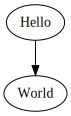

In [9]:
from graphviz import Digraph

g = Digraph('G', filename = 'hello.gv')
g.edge('Hello','World')
g

In [12]:
decision_tree = tree.DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
decision_tree.fit(X_encoded, Y)

dotfile = open('tree.dot', 'w')
tree.export_graphviz(decision_tree, out_file = dotfile, feature_names = X_encoded.columns)

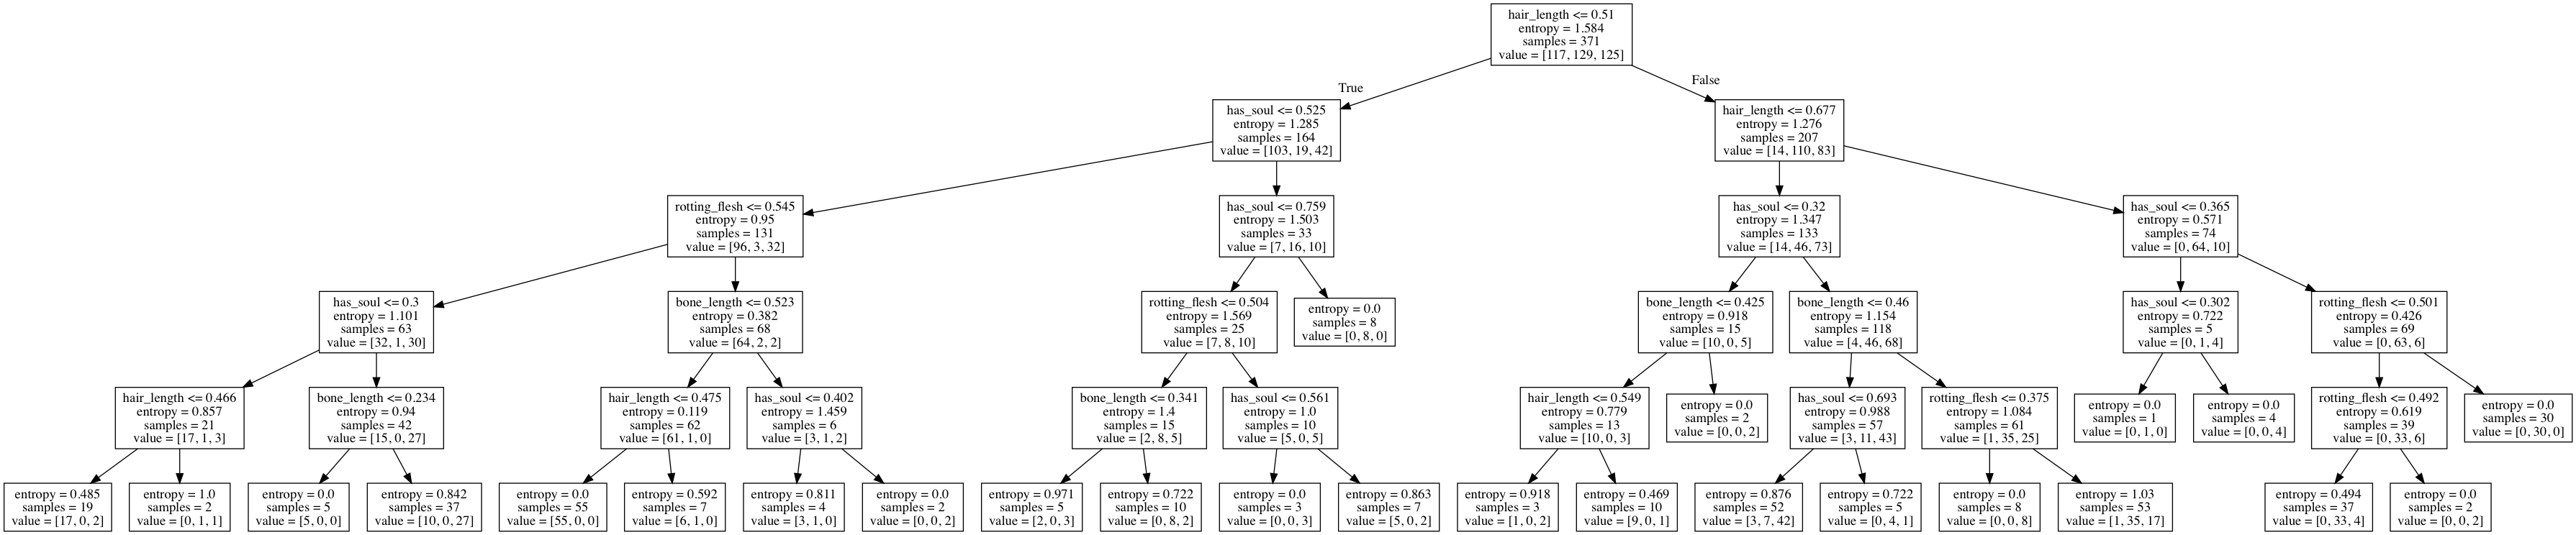

In [17]:
import pydotplus

from IPython.display import Image

dot_data = tree.export_graphviz(decision_tree, out_file = None, feature_names = X_encoded.columns)
graph = pydotplus.graphviz.graph_from_dot_data(dot_data)
Image(graph.create_png())